Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---



## External libraries

### Setup


For this lab install the following external libraries 

~~~
$ pip install pandas matplotlib requests
~~~


In [ ]:
import numpy as np
import pandas as pd
import numpy.testing as npt
import pandas.testing as pdt
import matplotlib.pyplot as plt
import requests
from IPython.display import Image, HTML

### Numpy

Complete the functions so that the required functionality is obtained


**1. Replace negative numbers in an array with zeros**

Here we expect the following behaviour: whereever an element is negative in the input array, the output array has those elements replaced with zeros

    >>> set_negative_to_zero([1, 2, -3, 4, 5])
    array([1, 2, 0, 4, 5])

Hint, lookup the documentation for [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)


In [ ]:
def set_negative_to_zero(a):
    return(np.where(a > 0, a, 0))

In [ ]:
a = np.array([1, 2, -3, 4, -5])
npt.assert_equal(set_negative_to_zero(a), [1, 2, 0, 4, 0])

**2. Create a copy of an array with all negative numbers removed**

The output array will have a smaller length here than the original

    >>> drop_negative_numbers(np.array([1, 2, -3, 4, -5]))
    array([1, 2, 4])

Hint: use the original array in a logical expression gives a boolean array that can filter your data

In [ ]:
def drop_negative_numbers(a):
    b = []
    for i in a:
        if i > 0:
            b.append(i)
        else:
            pass
    return(b)

In [ ]:
a = np.array([1, 2, -3, 4, -5])
b = drop_negative_numbers(a)
npt.assert_equal(b, [1, 2, 4])

## Matplotlib

Generate a plot with the following look

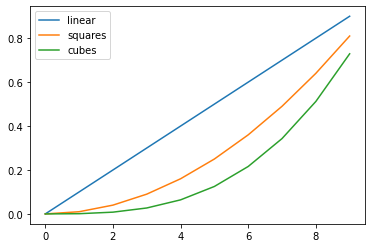



In [ ]:
# I CANT SEE "A PLOT WITH THE FOLLOWING LOOK".
# I DID MY BEST TO IMPROVISE!

points = np.arange(0, 1, .1)
points_squared = points ** 2
points_cubed = points ** 3

graphs = {'linear': points, 'squares': points_squared, 'cubes': points_cubed}

def myplot(**graphs):
    names = []
    for i,j in graphs.items():
        names.append(i.capitalize())
        titlename = ', '.join(names)
        x = list(range(0,len(j),1))
        plt.plot(x,j,label=i.capitalize())
        plt.legend(loc='best')
        plt.title(f'Plot of {titlename}')
        plt.xlabel('x-values')
        plt.ylabel('y-values')

myplot(linear=points, squares=points_squared, cubes=points_cubed) # equivalent to myplot(**graphs)

## Pandas

In this section we are going to read from a movie database into pandas. There is some setup required for this

    Goto http://www.omdbapi.com
    Click API Key
    Select FREE and enter your email

You will get a personal code in your mailbox, replace your personal key with the one below ina file omdb.py

    # omdb.py
    APIKEY = 'xxxxxx'

In [ ]:
try:
    from omdb import APIKEY
except ImportError:
    APIKEY = '6024bbe6'

Consider the following function, it takes a search term calls the requests library (get) which and returns a dictionary object looking will all matches

    >>> search_omdb('tarzan')
    {'Search': [{'Title': 'Tarzan',
    'Year': '1999',
    'imdbID': 'tt0120855',
    'Type': 'movie',
    ...
    
    

In [ ]:
def search_omdb(title):
    url = f'https://www.omdbapi.com/?apikey={APIKEY}&s={title}'
    r = requests.get(url)
    if r.ok:
       return r.json()

search_omdb('tarzan')

**3. Write a function that wraps the previous function search_omdb, and that returns**

    * a dataframe
    * has rows sorted by year
    * and the imdbID field as index



In [ ]:
def get_movies(title):
    result = search_omdb(title)
    if 'Search' in result:
        df = pd.DataFrame(result['Search']) # Only including the "search"-part of the dictionary
        df = df.set_index('imdbID') # Setting "imdbID" as index
        df.insert(0, 'Poster', df.pop('Poster')) # Moving the column named "Poster" to column index 0.
        df = df.sort_values(by='Year') # Sorting the dataframe by "year"
    return(df)

In [ ]:
movies = get_movies('hamlet')
assert set(movies.columns) == {'Poster', 'Title', 'Type', 'Year'}
assert movies.index.name == 'imdbID'
assert movies.Title.str.contains('hamlet', case=False).all()
assert movies.Year.iloc[0] == '1948'  # checks the year value of the first row

**4. Display posters**

Given that the Image function can be used to display an image url

In [ ]:
display(Image(url='https://www.kth.se/files/avatar/sigbritt'))

... write a function that takes a search term, calls get_movies and displays the posters that match the title

display_posters('python')

use the pandas dataframe method `iterrows` to loop over the rows of a data frame

The expected result should be something like:

~~~
display_posters('gone with the wind')
~~~

#[image.png](attachment:image.png)
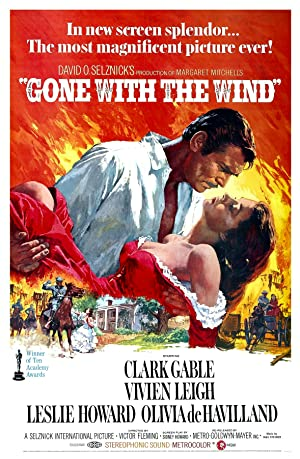

In [ ]:
def display_posters(title):
    movies = get_movies(title)
    if movies is not None:
        for i, row in movies.iterrows():

            # ---- PRINTING ALL AVAILABLE POSTERS ----
            url_string = row['Poster']
            display(Image(url=url_string))

            # # ---- USE THIS IF ONLY PRINT "EXACT" TITLE POSTERS ----
            # if title.lower() == row['Title'].lower():
            #     url_string = row['Poster']
            #     display(Image(url=url_string))
            # else:
            #     pass

In [ ]:
display_posters('gone with the wind')      

# PAST EXAM QUESTIONS:

### NumPy - Scalar Product and Why

The following does a scalar product of lists of numbers:

    >>> def sp(l1, l2):
            sum = 0.0
            for e1, e2 in zip(l1, l2):
                sum += e1*e2
            return sum

    >>> sp([1, 2], [3, 4])
    11.0

How would you use the numpy library for the same functionality and why in
general?

Answer:

``numpy.dot``

Explicit looping in Python is slow

### Google spreadsheet as input. What is the output?

The following function takes a Google spread-sheet as input. What is the data type of the return value?

    >>> import pandas as pd
    >>> def read_gsp(gid):
            return pd.read_csv(f’https://docs.google.com/spreadsheets/d/{gid}/export?gid=0&format=csv’)
    >>> retval = read_gsp(’1bUPG9DoB1AvhuDts0XaamtAZCdtIw-XVLFR_uLnKn2E’)
    >>> print(type(retval).__name__)

Answer:

``DataFrame``. Due to the fact that it is a "panda" variable.